In [0]:
#################################################################################################################
# Sentiment Analysis - Twitter Feed Democrats and Republicans and objective review of sentiment without bias    # 
# Project Data Analysis Task: Review the Twitter Feed of the President of the United States and the             # 
# Speaker of the House and present the results in a project Report both written and presented                   #
# (Information Visualization)                                                                                   # 
#################################################################################################################

In [0]:
####################################################################################################################
# Project Type: Twitter Data Sentiment Analysis and Tweet Text Tokention, Lemmitization, Stemmimng and NLP         #
# Project Charter: process one collection of Twiiter data and summarize information from a number of fields.       #
# This is similar to the example programs for Twitter hashtags or Facebook counts but must access different and    # 
# more fields than in those examples.                                                                              #
# Project Specified Tasks: process one collection of data and separate it into different categories and give some  # 
# summary statistics on those categories. For example, bin the tweets by day or by hour and report on the number   # 
# of tweets per day or hour. Process two or more collections of data and compare some summary data about the two   #
# collections.                                                                                                     #
# For example, collect Twitter user timelines from different political candidates and compare the number of        #
# retweets of their tweets.                                                                                        # 
# Project Deliverable: Sentiment Analysis of Twitter tweets on The President of the United States (POTUS) and the  #
# Speaker of the House                                                                                             #
# Project Type: Group Project                                                                                      #
# Project Team:                                                                                                    #
# Craig Beach                                                                                                      #
# Michael Esparza, PMP, PgMP, CPEM                                                                                 #
# Lily Han                                                                                                         #           
# Jo Vivian                                                                                                        # 
# Data Source is Twitter via Application Programming Interface (API)                                               #
####################################################################################################################

In [1]:
pip install tweepy

In [2]:
pip install joypy

In [0]:
# With the project plan in place and specifed and implied tasks outlined, import the required modules for the analysis.
# tweepy now imports because of pip install
# re module imported for manipulation of regular text expresssions
# nltk module imported for parsing and language operations and manipulation
import tweepy 
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import numpy as np
import joypy
import re    
import nltk  
import string
import warnings

In [0]:
# Based on the amount of data to be explored and reviewed, visual presentation will support the analysis
# Import the required modeuls for information visualization and presentation 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from scipy import stats

In [5]:
pip install credentials

In [6]:
# Determine the current working directory and review to ensure that the data environment is set
import os
cwd = os.getcwd()
print(cwd)

/content


In [7]:
# Review all files in the directory to ensure process is on proper path
import os
files = os.listdir()  
files

['.config', 'sample_data']

In [0]:
# Begin extraction of the raw twitter data. Keys will be required and used to access the raw data
# User Keys presented 
CONSUMER_KEY    = 'Z7swXxO5KISDASwxiJmoHXQnX'
CONSUMER_SECRET = 'VDBJKxoY3MCb7s5YbIl5lTk4HSgayQYIbVxRQ81iGtgD6MdyZq'
# Access Keys presented
ACCESS_TOKEN  = '418036639-PTleI12U9lBDsPDCdiJFjSYqhBkyskGjEScalAzA'
ACCESS_SECRET = 'DAkPHeIJbZ2vyNzGxY9JnoVPhcXoOjOw0o0pO7mItM6vP'
from credentials import *

In [0]:
# Define the Application Programming Interace (API) architecture for data analysis
# Execute authentication ping for API connection verification
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [0]:
# Define a data extraction function for twitter
xtr = twitter_setup()

In [11]:
# Construct a "tweet" list based on the Mr. Trump's user handle
# Counts attempted: 2000, 1000, 4000 and 5000. 500 yielded 200 tweets
tweets = xtr.user_timeline(screen_name="realDonaldTrump", count=5000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# From the tweet list, extract the most recent 10 tweets
print("The Ten Most Recent tweets from POTUS Twitter Handle:\n")
for tweet in tweets[:11]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

The Ten Most Recent tweets from POTUS Twitter Handle:

https://t.co/tOBcudSlcl

Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m

“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!

Incredible people, great Rally! https://t.co/3i6tgfqrRl

RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law 

“Our officers will not have their hands tied by…

RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,

“Wait, I thought the protocol was to…

RT @charliekirk11: Did you know:

Russia donated over $145,000,000 to the Clinton Foundation

Hillary Clinton sold 20% America’s Uranium to…

RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…

RT @prayingmedic: San Diego S

In [12]:
# With the tweet list constructed and most recent 10 tweets reviwed, convert the data to a pandas array
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data.head(11)

,Tweets
0,https://t.co/tOBcudSlcl
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m"
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl"
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…"
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…"
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…"
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…


In [13]:
# Identify the quantifiable data attributes to determine sentiment. Structure the required data in the array
# Review the data frame with the added data attributes
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
data['Tweets'] = np.array([tweet.text for tweet in tweets])
display(data.head(11))

,Tweets,len,ID,Date,Source,Likes,RTs
0,https://t.co/tOBcudSlcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,0,12121
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,0,36831
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,0,10394
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,0,15808
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,0,13231


In [0]:
#Export Dataframe to JSON
Export = data.to_json(r'Export_Tweets.json')

In [0]:
from google.colab import files
files.download("Export_Tweets.json")

In [16]:
_json_file = 'Export_Tweets.json'
pd_json = pd.read_json(_json_file, convert_dates=True)
pd_json.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs
0,https://t.co/tOBcudSlcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,0,12121
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,0,36831
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,0,10394
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,0,15808
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,0,13231


In [17]:
# Exploratory Data Analysis (EDA) first pass on tweet review, display raw data from the first tweet on the list
display(tweets[0].id)
display(tweets[0].created_at)
display(tweets[0].source)
display(tweets[0].favorite_count)
display(tweets[0].retweet_count)
display(tweets[0].geo)
display(tweets[0].coordinates)
display(tweets[0].entities)

1231302822785953792

datetime.datetime(2020, 2, 22, 19, 40, 44)

'Twitter for iPhone'

42166

11929

None

None

{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/tOBcudSlcl',
   'expanded_url': 'https://twitter.com/WhiteHouse/status/1230972708470579201/video/1',
   'id': 1230972618989285376,
   'id_str': '1230972618989285376',
   'indices': [0, 23],
   'media_url': 'http://pbs.twimg.com/media/ERVLJohWoAEWem6.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/ERVLJohWoAEWem6.jpg',
   'sizes': {'large': {'h': 1080, 'resize': 'fit', 'w': 1920},
    'medium': {'h': 675, 'resize': 'fit', 'w': 1200},
    'small': {'h': 383, 'resize': 'fit', 'w': 680},
    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
   'source_status_id': 1230972708470579201,
   'source_status_id_str': '1230972708470579201',
   'source_user_id': 822215673812119553,
   'source_user_id_str': '822215673812119553',
   'type': 'photo',
   'url': 'https://t.co/tOBcudSlcl'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}

In [18]:
# Determine the mean length of the tweets. tweets are limited to a specific character count, and longer tweet contains 
# additional raw data for sentiment analysis than a short tweet
## Stop Length for a tweet is 140 characters
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
##Average Tweet Length
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The length's average in tweets: {}".format(mean))

The length's average in tweets: 117.445


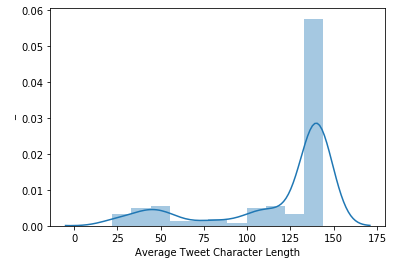

In [19]:
# Visually Represent the mean length of the tweets to the view the statistical spread
sns.distplot(data['len']);
plt.xlabel("Average Tweet Character Length")
plt.ylabel("_")
# Remove the plot text for a clean visual
plt.show()

In [20]:
# After caculating the average length of a tweet, determine the word count
data['word_count'] = data['Tweets'].apply(lambda x: len(str(x).split(" ")))
data[['Tweets','word_count']].head(11)

,Tweets,word_count
0,https://t.co/tOBcudSlcl,1
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",23
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,12
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",5
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",23
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",21
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",18
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,23
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,20
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,22


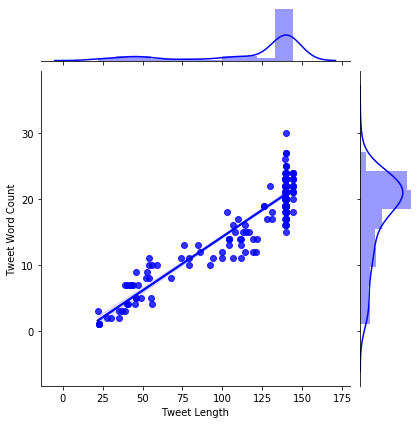

In [21]:
# Visually Represent the word count of the tweets vs the twwet length to the view the statistical relation
sns.jointplot(data = data, x = 'len', y = 'word_count', kind = 'reg', color = 'b')
plt.xlabel("Tweet Length")
plt.ylabel("Tweet Word Count")
# Remove the plot text for a clean visual
plt.show()
# As tweet length increases, so does the word count - word count and tweet length have a positive relation

In [22]:
data.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count
0,https://t.co/tOBcudSlcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929,1
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650,23
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312,12
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337,5
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902,23
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,0,12121,21
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,0,36831,18
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,0,10394,23
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,0,15808,20
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,0,13231,22


In [23]:
# Number of Characters - this metric also includes white space
data['char_count'] = data['Tweets'].str.len() 
mean2 = np.mean(data['char_count'])
print("The average character length: {}".format(mean2))

The average character length: 117.445


In [24]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Tweets'].apply(lambda x: avg_word(x))
a = data[['Tweets', 'len', 'ID','Date','Source','char_count','word_count','avg_word', 'Likes', 'RTs']].head(11)
a

,Tweets,len,ID,Date,Source,char_count,word_count,avg_word,Likes,RTs
0,https://t.co/tOBcudSlcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,23,1,23.000000,42166,11929
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,144,23,5.304348,65619,15650
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,86,12,6.250000,45229,10312
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,55,5,10.200000,78550,18337
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,139,23,5.000000,0,10902
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,139,21,5.318182,0,12121
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,140,18,5.950000,0,36831
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,140,23,5.130435,0,10394
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,140,20,5.714286,0,15808
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,140,22,5.227273,0,13231


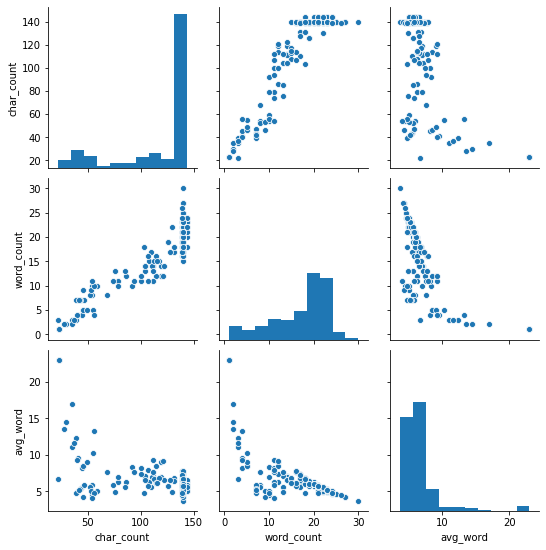

In [25]:
x = sns.pairplot(data[['char_count','word_count','avg_word']], diag_kind="hist")
 
for ax in x.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=0)

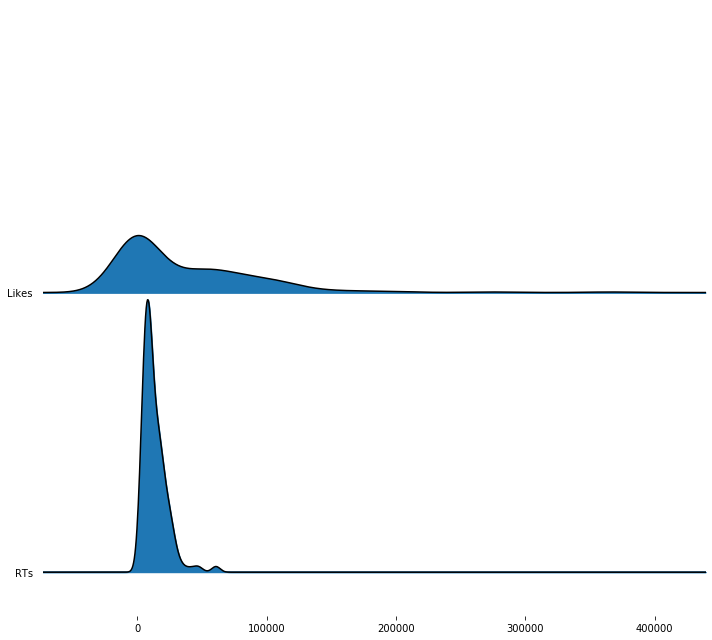

In [26]:
b = data[['Likes', 'RTs']]
fig, axes = joypy.joyplot(b, figsize=(10,9))

In [27]:
a = data 
display(a)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word
0,https://t.co/tOBcudSlcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929,1,23,23.000000
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650,23,144,5.304348
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312,12,86,6.250000
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337,5,55,10.200000
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902,23,139,5.000000
...,...,...,...,...,...,...,...,...,...,...
195,RT @ericbolling: Early on in 2015.. I saw something in @realDonaldTrump and I predicted his win.\n\nSome are trying to do the same thing...…,139,1228810583337771009,2020-02-15 22:37:27,Twitter for iPhone,0,6122,24,139,4.750000
196,RT @WhiteHouse: President @realDonaldTrump and @FLOTUS welcomed the President and First Lady of Ecuador to the White House this week! 🇺🇸🇪🇨…,139,1228810333944459264,2020-02-15 22:36:28,Twitter for iPhone,0,5455,21,139,5.666667
197,BIG PROGRESS! https://t.co/DfWA7FRSGQ,37,1228810227321069571,2020-02-15 22:36:03,Twitter for iPhone,39581,9986,3,37,11.666667
198,"Remember, will be at Daytona 500 tomorrow!",42,1228810073171951621,2020-02-15 22:35:26,Twitter for iPhone,144941,22112,7,42,5.142857


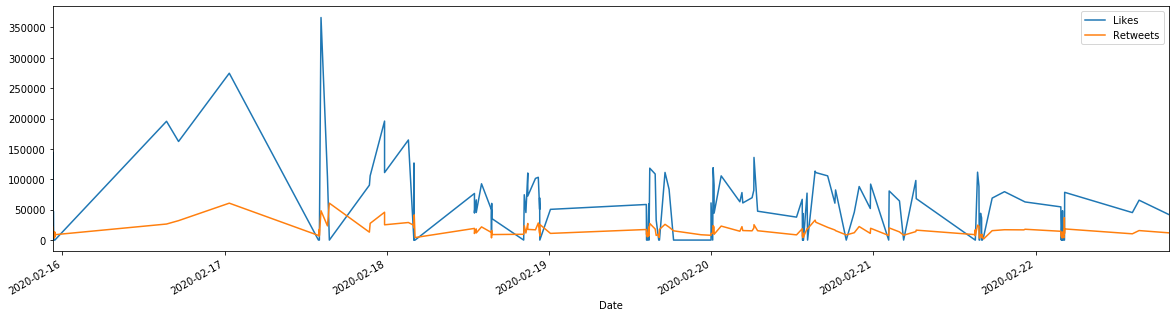

In [28]:
# Execute Temporal Analysis over data collection period - present tweet likes and retweets, present visually 
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
# Likes vs retweets visualization:
tfav.plot(figsize=(20,5), label="Likes", legend=True)
tret.plot(figsize=(20,5), label="Retweets", legend=True);

In [29]:
# Execute a data call for a available data sources, and print the data source for verfication and reporting
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


In [30]:
# Identify the tweet from the POTUS handle with the most likes and retweets, print the results

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

print('The tweet with the most likes from the POTUS twitter handle is: \n{}'.format(data['Tweets'][fav])) 
print('The Total Number of Likes for this Tweet: {}'.format(fav_max))
print('The Tweet has a length of: {} characters.\n'.format(data['len'][fav]))

print('The tweet with the most retweets is: \n{}'.format(data['Tweets'][rt]))
print('This tweet has been retweeted: {}'.format(rt_max), 'times')
print('The Character Length of this retweet is: {} characters.\n'. format(data['len'][rt]))

The tweet with the most likes from the POTUS twitter handle is: 
HAPPY PRESIDENT’S DAY!
The Total Number of Likes for this Tweet: 366140
The Tweet has a length of: 22 characters.

The tweet with the most retweets is: 
RT @realDonaldTrump: #DAYTONA500 https://t.co/fT8L0EZqXh
This tweet has been retweeted: 60728 times
The Character Length of this retweet is: 56 characters.



In [31]:
# With the initial stage of the data task complete (data collection and cleaning), the data analysis task proceeds
# to sentiment analysis
# The NLTK module is imported to support the sentiment analysis, identifying the stopwords
# stopwords will complicate the sentiment analysis
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
data.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word
0,https://t.co/tOBcudSlcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929,1,23,23.000000
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650,23,144,5.304348
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312,12,86,6.250000
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337,5,55,10.200000
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902,23,139,5.000000
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,0,12121,21,139,5.318182
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,0,36831,18,140,5.950000
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,0,10394,23,140,5.130435
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,0,15808,20,140,5.714286
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,0,13231,22,140,5.227273


In [33]:
# From NLTK, import english stopwords and identify them and fit to the data
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Tweets','Date','Likes','RTs','char_count','word_count','avg_word','stopwords']].head(11)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords
0,https://t.co/tOBcudSlcl,2020-02-22 19:40:44,42166,11929,23,1,23.000000,0
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",2020-02-22 15:18:17,65619,15650,144,23,5.304348,9
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,2020-02-22 14:18:33,45229,10312,86,12,6.250000,3
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",2020-02-22 04:17:45,78550,18337,55,5,10.200000,0
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",2020-02-22 04:16:01,0,10902,139,23,5.000000,5
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",2020-02-22 04:15:35,0,12121,139,21,5.318182,7
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",2020-02-22 04:14:51,0,36831,140,18,5.950000,4
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,2020-02-22 04:14:23,0,10394,140,23,5.130435,8
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,2020-02-22 04:13:53,0,15808,140,20,5.714286,7
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,2020-02-22 04:13:13,0,13231,140,22,5.227273,4


In [34]:
# Identify the tweets and retweets that have been hash tagged 
data['hashtags'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'avg_word','stopwords','hashtags']].head(11)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords,hashtags
0,https://t.co/tOBcudSlcl,2020-02-22 19:40:44,42166,11929,23,1,23.000000,0,0
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",2020-02-22 15:18:17,65619,15650,144,23,5.304348,9,0
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,2020-02-22 14:18:33,45229,10312,86,12,6.250000,3,0
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",2020-02-22 04:17:45,78550,18337,55,5,10.200000,0,0
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",2020-02-22 04:16:01,0,10902,139,23,5.000000,5,0
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",2020-02-22 04:15:35,0,12121,139,21,5.318182,7,0
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",2020-02-22 04:14:51,0,36831,140,18,5.950000,4,0
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,2020-02-22 04:14:23,0,10394,140,23,5.130435,8,0
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,2020-02-22 04:13:53,0,15808,140,20,5.714286,7,0
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,2020-02-22 04:13:13,0,13231,140,22,5.227273,4,0


In [35]:
# Identify the tweets and retweets that contain numeric data
data['numerics'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'avg_word','stopwords','hashtags','numerics']].head(11)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords,hashtags,numerics
0,https://t.co/tOBcudSlcl,2020-02-22 19:40:44,42166,11929,23,1,23.000000,0,0,0
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",2020-02-22 15:18:17,65619,15650,144,23,5.304348,9,0,0
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,2020-02-22 14:18:33,45229,10312,86,12,6.250000,3,0,0
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",2020-02-22 04:17:45,78550,18337,55,5,10.200000,0,0,0
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",2020-02-22 04:16:01,0,10902,139,23,5.000000,5,0,1
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",2020-02-22 04:15:35,0,12121,139,21,5.318182,7,0,0
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",2020-02-22 04:14:51,0,36831,140,18,5.950000,4,0,0
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,2020-02-22 04:14:23,0,10394,140,23,5.130435,8,0,0
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,2020-02-22 04:13:53,0,15808,140,20,5.714286,7,0,0
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,2020-02-22 04:13:13,0,13231,140,22,5.227273,4,0,0


In [36]:
# Identify Tweets and Retweets that contain uppercase words
data['upper'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'word_count','avg_word','stopwords','hashtags','numerics','upper']].head(11)

,Tweets,Date,Likes,RTs,char_count,word_count,word_count,avg_word,stopwords,hashtags,numerics,upper
0,https://t.co/tOBcudSlcl,2020-02-22 19:40:44,42166,11929,23,1,1,23.000000,0,0,0,0
1,"Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in Nov… https://t.co/fegmOvCL5m",2020-02-22 15:18:17,65619,15650,144,23,23,5.304348,9,0,0,1
2,“An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!,2020-02-22 14:18:33,45229,10312,86,12,12,6.250000,3,0,0,1
3,"Incredible people, great Rally! https://t.co/3i6tgfqrRl",2020-02-22 04:17:45,78550,18337,55,5,5,10.200000,0,0,0,0
4,"RT @katrina_wiser: ICE Arrests 2 Illegal Aliens in CA Courthouse, Flouting New State Law \n\n“Our officers will not have their hands tied by…",2020-02-22 04:16:01,0,10902,139,23,23,5.000000,5,0,1,3
5,"RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,\n\n“Wait, I thought the protocol was to…",2020-02-22 04:15:35,0,12121,139,21,21,5.318182,7,0,0,3
6,"RT @charliekirk11: Did you know:\n\nRussia donated over $145,000,000 to the Clinton Foundation\n\nHillary Clinton sold 20% America’s Uranium to…",2020-02-22 04:14:51,0,36831,140,18,18,5.950000,4,0,0,1
7,RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…,2020-02-22 04:14:23,0,10394,140,23,23,5.130435,8,0,0,1
8,RT @prayingmedic: San Diego Sheriff's Department is the first to announce its cooperation with ICE.\nThey will share information about crimi…,2020-02-22 04:13:53,0,15808,140,20,20,5.714286,7,0,0,2
9,RT @Jamierodr14: BAM! \n\nTrey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. \n\nThis…,2020-02-22 04:13:13,0,13231,140,22,22,5.227273,4,0,0,3


In [37]:
# With the inital EDA complete, convert the tweet text to lower case for context frre grammar (CFG) sentiment analysis task
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Tweets'].head(11)

0                                                                                                                              https://t.co/tobcudslcl
1     democrats in the great state of nevada (which, because of the economy, jobs, the military &amp; vets, i will win in nov… https://t.co/fegmovcl5m
2                                                               “an investigation into nothing.” the wonderful @trish_regan on the mueller witch hunt!
3                                                                                              incredible people, great rally! https://t.co/3i6tgfqrrl
4            rt @katrina_wiser: ice arrests 2 illegal aliens in ca courthouse, flouting new state law “our officers will not have their hands tied by…
5           rt @johncardillo: friend of mine, a jag lawyer, just made an interesting point about russia/sanders, “wait, i thought the protocol was to…
6           rt @charliekirk11: did you know: russia donated over $145,000,000 to the clinton f

In [38]:
# Strip the text of punctuation in order to have clean text data for the analysis
data['Tweets'] = data['Tweets'].str.replace('[^\w\s]','')
data['Tweets'].head(11)

0                                                                                                                            httpstcotobcudslcl
1           democrats in the great state of nevada which because of the economy jobs the military amp vets i will win in nov httpstcofegmovcl5m
2                                                             an investigation into nothing the wonderful trish_regan on the mueller witch hunt
3                                                                                              incredible people great rally httpstco3i6tgfqrrl
4          rt katrina_wiser ice arrests 2 illegal aliens in ca courthouse flouting new state law our officers will not have their hands tied by
5             rt johncardillo friend of mine a jag lawyer just made an interesting point about russiasanders wait i thought the protocol was to
6             rt charliekirk11 did you know russia donated over 145000000 to the clinton foundation hillary clinton sold 20 americas ura

In [39]:
# Remove the english commonly used stopword for a clear grammar
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Tweets']= data['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Tweets'].head(11)

0                                                                                                    httpstcotobcudslcl
1                                democrats great state nevada economy jobs military amp vets win nov httpstcofegmovcl5m
2                                                        investigation nothing wonderful trish_regan mueller witch hunt
3                                                                      incredible people great rally httpstco3i6tgfqrrl
4                rt katrina_wiser ice arrests 2 illegal aliens ca courthouse flouting new state law officers hands tied
5                     rt johncardillo friend mine jag lawyer made interesting point russiasanders wait thought protocol
6            rt charliekirk11 know russia donated 145000000 clinton foundation hillary clinton sold 20 americas uranium
7              rt seanmdav coincidence russia always happens support whoever democrat party elites trying destroy given
8                  rt prayingmedic san d

In [40]:
#Remove common words and review the resulting grammar
freq = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:30]
freq

rt                 109
president           32
realdonaldtrump     27
trump               17
great               17
economy             15
amp                 14
thank               13
mini                11
mike                11
new                 10
tomfitton           10
democrats           10
senategop           10
jobs                 9
daytona              8
500                  8
us                   7
senate               7
like                 7
americans            7
american             7
big                  7
years                7
bernie               6
whitehouse           6
danscavino           6
donald               6
fake                 6
back                 6
dtype: int64

In [41]:
# For Retweets, remove the short words and review the results
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,httpstcotobcudslcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929,1,23,23.000000,0,0,0,0
1,democrats great state nevada economy jobs military vets httpstcofegmovcl5m,144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650,23,144,5.304348,9,0,0,1
2,investigation nothing wonderful trish_regan mueller witch hunt,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312,12,86,6.250000,3,0,0,1
3,incredible people great rally httpstco3i6tgfqrrl,55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337,5,55,10.200000,0,0,0,0
4,katrina_wiser arrests illegal aliens courthouse flouting state officers hands tied,139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902,23,139,5.000000,5,0,1,3
5,johncardillo friend mine lawyer made interesting point russiasanders wait thought protocol,139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,0,12121,21,139,5.318182,7,0,0,3
6,charliekirk11 know russia donated 145000000 clinton foundation hillary clinton sold americas uranium,140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,0,36831,18,140,5.950000,4,0,0,1
7,seanmdav coincidence russia always happens support whoever democrat party elites trying destroy given,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,0,10394,23,140,5.130435,8,0,0,1
8,prayingmedic diego sheriffs department first announce cooperation share information crimi,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,0,15808,20,140,5.714286,7,0,0,2
9,jamierodr14 trey gowdy slams report claiming russia trying help president trump reelected november,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,0,13231,22,140,5.227273,4,0,0,3


In [42]:
# With short words removed, conduct another run to remove common words and shorten the grammar to be subjected to analysis
freq = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:30]
freq

president          32
realdonaldtrump    27
great              17
trump              17
economy            15
thank              13
mini               11
mike               11
democrats          10
senategop          10
tomfitton          10
jobs                9
daytona             8
american            7
americans           7
senate              7
years               7
like                7
bernie              6
danscavino          6
donald              6
fake                6
back                6
whitehouse          6
made                5
mueller             5
last                5
unemployment        5
economic            5
tonight             5
dtype: int64

In [0]:
# Upon review of the resulting grammar after the processing, spelling normalization is required
# Correct the spelling of the grammar by importing textblob module

In [43]:
pip install textblob

In [44]:
#After the pip install, import the required module for the data analysis task
from textblob import TextBlob
data['Tweets'][:11].apply(lambda x: str(TextBlob(x).correct()))

0                                                                                       httpstcotobcudslcl
1                               democrats great state nevada economy jobs military gets httpstcofegmovcl5m
2                                            investigation nothing wonderful trish_regan fuller witch hunt
3                                                         incredible people great rally httpstco3i6tgfqrrl
4                       katrina_wiser arrests illegal aliens courthouse floating state officers hands tied
5               johncardillo friend mine lawyer made interesting point russiasanders wait thought protocol
6     charliekirk11 know russia donate 145000000 clinton foundation axillary clinton sold american cranium
7     seanmdav coincidence russia always happens support whoever democrat party elite trying destroy given
8                 prayingmedic diego sheriff department first announce cooperation share information crime
9       jamierodr14 they rowdy slums 

In [45]:
# With the cleaned grammar lexicon, begin text mining for data sentiment
data.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,httpstcotobcudslcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929,1,23,23.000000,0,0,0,0
1,democrats great state nevada economy jobs military vets httpstcofegmovcl5m,144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650,23,144,5.304348,9,0,0,1
2,investigation nothing wonderful trish_regan mueller witch hunt,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312,12,86,6.250000,3,0,0,1
3,incredible people great rally httpstco3i6tgfqrrl,55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337,5,55,10.200000,0,0,0,0
4,katrina_wiser arrests illegal aliens courthouse flouting state officers hands tied,139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902,23,139,5.000000,5,0,1,3
5,johncardillo friend mine lawyer made interesting point russiasanders wait thought protocol,139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,0,12121,21,139,5.318182,7,0,0,3
6,charliekirk11 know russia donated 145000000 clinton foundation hillary clinton sold americas uranium,140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,0,36831,18,140,5.950000,4,0,0,1
7,seanmdav coincidence russia always happens support whoever democrat party elites trying destroy given,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,0,10394,23,140,5.130435,8,0,0,1
8,prayingmedic diego sheriffs department first announce cooperation share information crimi,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,0,15808,20,140,5.714286,7,0,0,2
9,jamierodr14 trey gowdy slams report claiming russia trying help president trump reelected november,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,0,13231,22,140,5.227273,4,0,0,3


In [46]:
# Review the tweet text data to start to identify patterns and general sentiment
text = data['Tweets']
text.head(11)

0                                                                                        httpstcotobcudslcl
1                                democrats great state nevada economy jobs military vets httpstcofegmovcl5m
2                                            investigation nothing wonderful trish_regan mueller witch hunt
3                                                          incredible people great rally httpstco3i6tgfqrrl
4                        katrina_wiser arrests illegal aliens courthouse flouting state officers hands tied
5                johncardillo friend mine lawyer made interesting point russiasanders wait thought protocol
6      charliekirk11 know russia donated 145000000 clinton foundation hillary clinton sold americas uranium
7     seanmdav coincidence russia always happens support whoever democrat party elites trying destroy given
8                 prayingmedic diego sheriffs department first announce cooperation share information crimi
9        jamierodr14 trey go

In [0]:
# Clean the tweet text, and remove unrequired white spaces
# Import the required module 
def tweet_cleaner_(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [48]:
pip install twython

  Created wheel for twython: filename=twython-3.7.0-cp36-none-any.whl size=31996 sha256=ebcd25581246f1d779918a170cc2ae28a3d02afb6944e7a8403397417393540b
  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython


In [49]:
pip install wordcloud

In [0]:
# Import the required modules to conduct the sentiment analysis. In order to present the sentiment information visually
# employ word clouds and charts to present and visualize the sentiment
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [0]:
# With the cleaned grammar, create a string of words from the text list to mine
raw_string = ''.join(text)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [0]:
# Continue to refine the data task and grammar by removing stop words, short connectors and indefinte articles
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [53]:
# Create a grammar word cloud based on the mined text for and inital review of the tweets sentiment. maximize the word count
# at 3000
wc = WordCloud(background_color="gray", max_words=3000)
clean_string = ','.join(words)
wc.generate(clean_string)

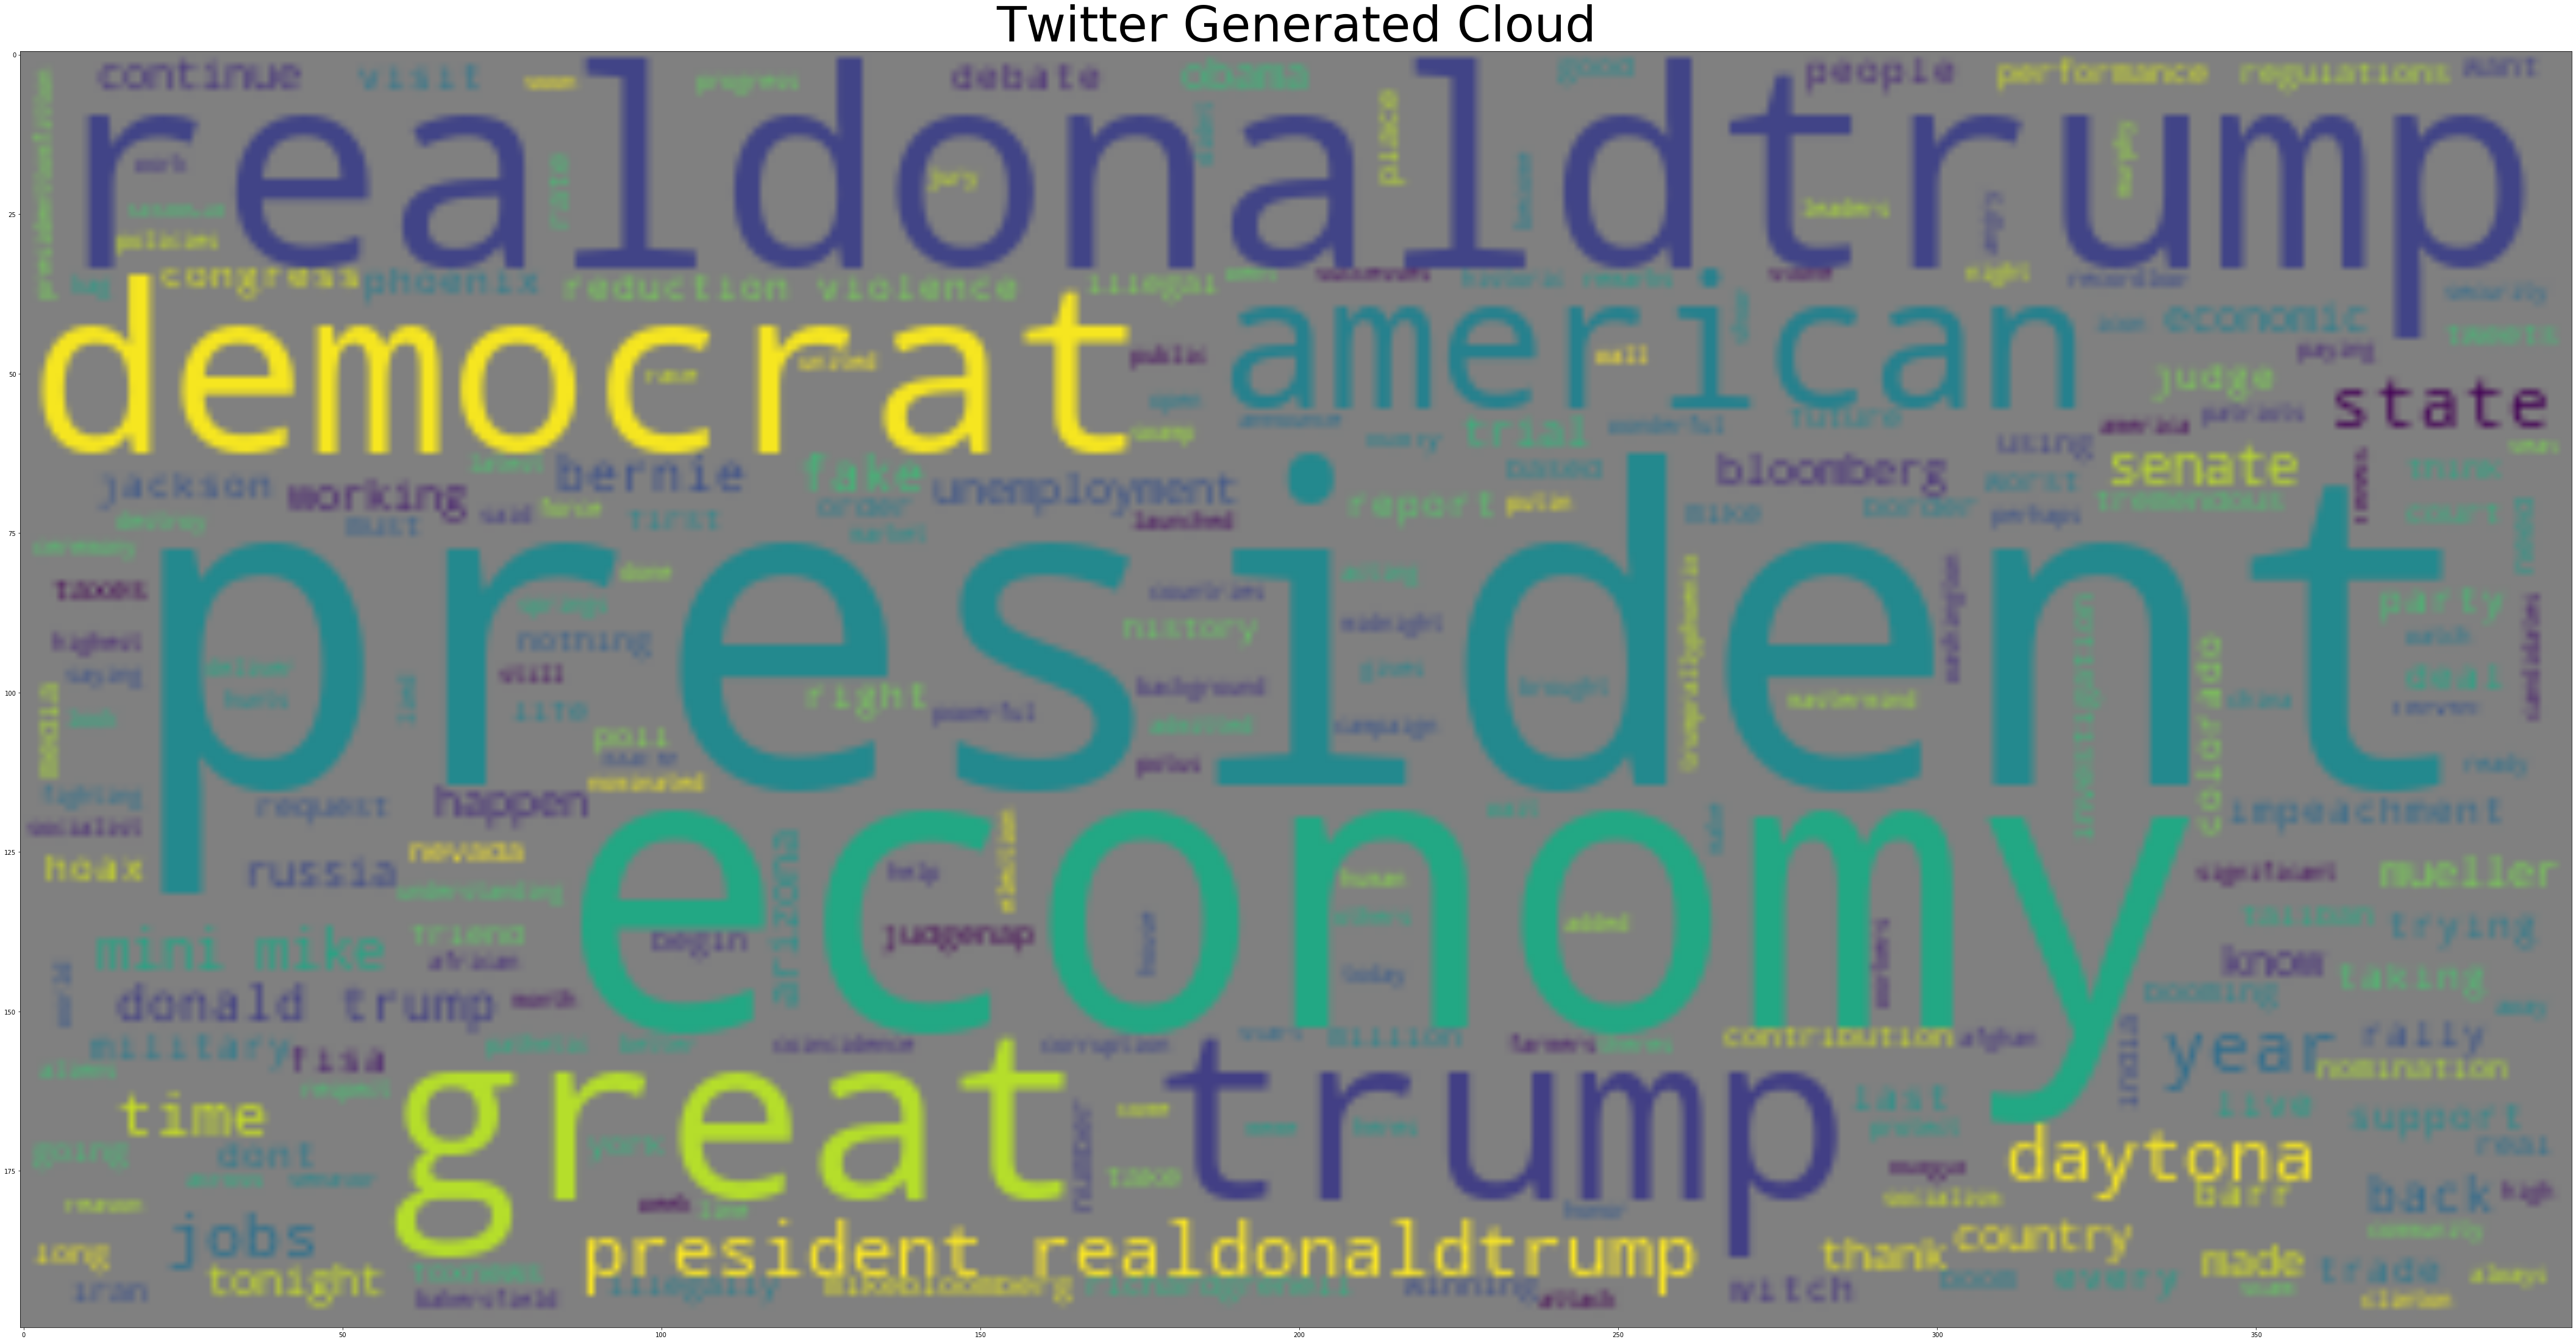

In [54]:
# Generate the Word Cloud Plot and compare against the initial text mine processes
w = plt.figure(figsize=(75,75))
plt.title('Original Stencil', size=50)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=80)
plt.show()

In [0]:
# With the viusal from the Word Cloud, proceed with a quantitative sentiment analysis. 
# Initial review indicates a negative sentiment, although "great" and "president" almost have the same weight in the 
# Word Cloud
# Remove the links and special characters in the mined text
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [56]:
# Display the results of the sub-program
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
display(data.head(11))

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,SA
0,httpstcotobcudslcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929,1,23,23.000000,0,0,0,0,0
1,democrats great state nevada economy jobs military vets httpstcofegmovcl5m,144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650,23,144,5.304348,9,0,0,1,1
2,investigation nothing wonderful trish_regan mueller witch hunt,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312,12,86,6.250000,3,0,0,1,1
3,incredible people great rally httpstco3i6tgfqrrl,55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337,5,55,10.200000,0,0,0,0,1
4,katrina_wiser arrests illegal aliens courthouse flouting state officers hands tied,139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902,23,139,5.000000,5,0,1,3,-1
5,johncardillo friend mine lawyer made interesting point russiasanders wait thought protocol,139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,0,12121,21,139,5.318182,7,0,0,3,1
6,charliekirk11 know russia donated 145000000 clinton foundation hillary clinton sold americas uranium,140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,0,36831,18,140,5.950000,4,0,0,1,0
7,seanmdav coincidence russia always happens support whoever democrat party elites trying destroy given,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,0,10394,23,140,5.130435,8,0,0,1,-1
8,prayingmedic diego sheriffs department first announce cooperation share information crimi,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,0,15808,20,140,5.714286,7,0,0,2,1
9,jamierodr14 trey gowdy slams report claiming russia trying help president trump reelected november,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,0,13231,22,140,5.227273,4,0,0,3,0


In [0]:
# Using a Postive, Neutral and Negative binning process
# Create the requisite lists based in their weights and sentiment
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [58]:
# Calculate the percentage of each classification
print('Percentage of positive tweets: {}%'.format(len(pos_tweets)*100/len(data['Tweets'])))
print('Percentage of neutral tweets: {}%'.format(len(neu_tweets)*100/len(data['Tweets'])))
print('Percentage of negative tweets: {}%'.format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 38.5%
Percentage of neutral tweets: 43.0%
Percentage of negative tweets: 18.5%


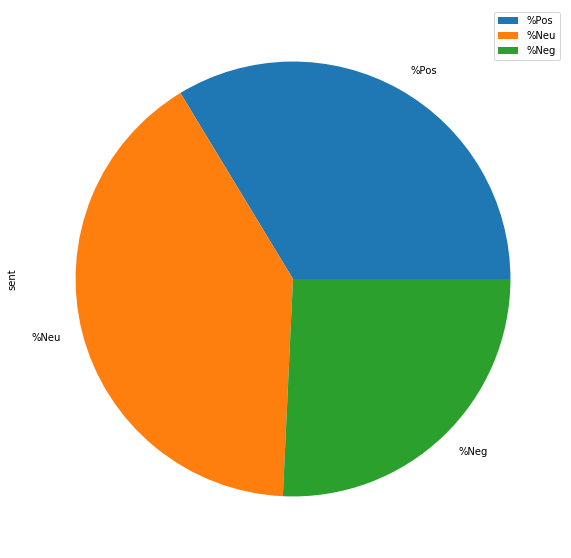

In [59]:
# Plot the percentages of the analysis in a pie chart, round up per standard statistical convention
df = pd.DataFrame({'sent': [34, 41, 26]},index=['%Pos', '%Neu', '%Neg'])
plot = df.plot.pie(y='sent', figsize=(10, 10))

In [61]:
#Tokenization
import nltk
nltk.download('punkt')
TextBlob(data['Tweets'][50]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['juddpdeere45', 'richardgrenell', 'friend', 'tremendous', 'public', 'servant', 'appointment', 'realdonaldtrump', 'historic', 'making'])

In [62]:
# Stemming of -ing, 's and -ly
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Tweets'][:11].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                                                                 httpstcotobcudslcl
1                            democrat great state nevada economi job militari vet httpstcofegmovcl5m
2                                                investig noth wonder trish_regan mueller witch hunt
3                                                        incred peopl great ralli httpstco3i6tgfqrrl
4                                katrina_wis arrest illeg alien courthous flout state offic hand tie
5               johncardillo friend mine lawyer made interest point russiasand wait thought protocol
6     charliekirk11 know russia donat 145000000 clinton foundat hillari clinton sold america uranium
7         seanmdav coincid russia alway happen support whoever democrat parti elit tri destroy given
8                            prayingmed diego sheriff depart first announc cooper share inform crimi
9               jamierodr14 trey gowdi slam report claim russia tri help presid trump reele

In [63]:
# Convert Words to the root word
import nltk
nltk.download('wordnet')
from textblob import Word
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Tweets'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0                                                                httpstcotobcudslcl
1           democrat great state nevada economy job military vet httpstcofegmovcl5m
2                    investigation nothing wonderful trish_regan mueller witch hunt
3                                  incredible people great rally httpstco3i6tgfqrrl
4    katrina_wiser arrest illegal alien courthouse flouting state officer hand tied
Name: Tweets, dtype: object

In [64]:
# N-Grams - Combo of bigrams N=2 and N=3
# Determine which words occur in combination for further analysis
TextBlob(data['Tweets'][0]).ngrams(2)

[]

In [65]:
TextBlob(data['Tweets'][0]).ngrams(3)

[]

In [66]:
# Review the raw text and array 
a.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,SA
0,httpstcotobcudslcl,23,1231302822785953792,2020-02-22 19:40:44,Twitter for iPhone,42166,11929,1,23,23.000000,0,0,0,0,0
1,democrat great state nevada economy job military vet httpstcofegmovcl5m,144,1231236777744257024,2020-02-22 15:18:17,Twitter for iPhone,65619,15650,23,144,5.304348,9,0,0,1,1
2,investigation nothing wonderful trish_regan mueller witch hunt,86,1231221743647436801,2020-02-22 14:18:33,Twitter for iPhone,45229,10312,12,86,6.250000,3,0,0,1,1
3,incredible people great rally httpstco3i6tgfqrrl,55,1231070547607511040,2020-02-22 04:17:45,Twitter for iPhone,78550,18337,5,55,10.200000,0,0,0,0,1
4,katrina_wiser arrest illegal alien courthouse flouting state officer hand tied,139,1231070112423317504,2020-02-22 04:16:01,Twitter for iPhone,0,10902,23,139,5.000000,5,0,1,3,-1
5,johncardillo friend mine lawyer made interesting point russiasanders wait thought protocol,139,1231070003379744768,2020-02-22 04:15:35,Twitter for iPhone,0,12121,21,139,5.318182,7,0,0,3,1
6,charliekirk11 know russia donated 145000000 clinton foundation hillary clinton sold america uranium,140,1231069816867430401,2020-02-22 04:14:51,Twitter for iPhone,0,36831,18,140,5.950000,4,0,0,1,0
7,seanmdav coincidence russia always happens support whoever democrat party elite trying destroy given,140,1231069700538470400,2020-02-22 04:14:23,Twitter for iPhone,0,10394,23,140,5.130435,8,0,0,1,-1
8,prayingmedic diego sheriff department first announce cooperation share information crimi,140,1231069574356926464,2020-02-22 04:13:53,Twitter for iPhone,0,15808,20,140,5.714286,7,0,0,2,1
9,jamierodr14 trey gowdy slam report claiming russia trying help president trump reelected november,140,1231069406144466944,2020-02-22 04:13:13,Twitter for iPhone,0,13231,22,140,5.227273,4,0,0,3,0


In [67]:
import string 
from nltk.corpus import stopwords 
stopwords = stopwords.words("english")

def _clean(txt):
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in string.punctuation)
    words = txt.split()
    words = [w for w in words if w not in stopwords]
    txt = " ".join(words)
    return txt

a["cleaned"] = a['Tweets'].apply(lambda x : _clean(x))

a[["Tweets", "cleaned"]]

,Tweets,cleaned
0,httpstcotobcudslcl,httpstcotobcudslcl
1,democrat great state nevada economy job military vet httpstcofegmovcl5m,democrat great state nevada economy job military vet httpstcofegmovcl5m
2,investigation nothing wonderful trish_regan mueller witch hunt,investigation nothing wonderful trishregan mueller witch hunt
3,incredible people great rally httpstco3i6tgfqrrl,incredible people great rally httpstco3i6tgfqrrl
4,katrina_wiser arrest illegal alien courthouse flouting state officer hand tied,katrinawiser arrest illegal alien courthouse flouting state officer hand tied
...,...,...
195,ericbolling early 2015 something realdonaldtrump predicted trying thing,ericbolling early 2015 something realdonaldtrump predicted trying thing
196,whitehouse president realdonaldtrump flotus welcomed president first lady ecuador white house week,whitehouse president realdonaldtrump flotus welcomed president first lady ecuador white house week
197,progress httpstcodfwa7frsgq,progress httpstcodfwa7frsgq
198,remember daytona tomorrow,remember daytona tomorrow


In [68]:
# Identify key Words of the Data Task 
from collections import Counter
complete_text = " ".join(data["Tweets"])
clean_text = _clean(complete_text)
Counter(clean_text.split()).most_common(10)

[('president', 33),
 ('realdonaldtrump', 27),
 ('trump', 19),
 ('great', 17),
 ('democrat', 15),
 ('economy', 15),
 ('american', 14),
 ('thank', 13),
 ('mike', 11),
 ('mini', 11)]

In [69]:
# Identify the Top 10 Uniform Resource Locators (URL) for further investigation 
htags = [w for w in complete_text.split() if w.startswith("http")]
htags = [w for w in htags if "demon" not in w.lower()]
Counter(htags).most_common(10)

[('httpstcoft8l0ezqxh', 2),
 ('httpstcotobcudslcl', 1),
 ('httpstcofegmovcl5m', 1),
 ('httpstco3i6tgfqrrl', 1),
 ('httpstcogfblh8w4ox', 1),
 ('httpstcom4kvegzsqo', 1),
 ('httpstco4gejmvto2j', 1),
 ('httpstcoum2idyfapy', 1),
 ('httpstcoktbd16zrh4', 1),
 ('httpstcocuj7wlvk29', 1)]

In [70]:
# Identify the major themes in the grammar and as a result of text mining 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

def create_theme_models(text):
    cvectorizer = CountVectorizer(min_df=4, max_features=3000)
    cvz = cvectorizer.fit_transform(text)

    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
    X_topics = lda_model.fit_transform(cvz)

    theme_word = lda_model.components_ 
    vocab = cvectorizer.get_feature_names()
    return theme_word, vocab 

n_top_words = 10
theme_word, vocab = create_theme_models(a["cleaned"].values)
for i, theme_dist in enumerate(theme_word):
    theme_words = np.array(vocab)[np.argsort(theme_dist)][:-(n_top_words+1):-1]
    print ("Theme " + str(i+1) + ": " + " | ".join(theme_words) + "\n")

Theme 1: trump | daytona | president | visit | donald | history | american | taking | teamtrump | like

Theme 2: president | realdonaldtrump | state | whitehouse | united | reduction | danscavino | senatemajldr | support | trying

Theme 3: democrat | job | military | senategop | senate | economy | never | hoax | witch | hunt

Theme 4: great | thank | congress | made | think | soon | right | colorado | back | daytona500

Theme 5: back | year | thank | kag2020 | great | senate | people | american | support | job

Theme 6: tomfitton | investigation | mueller | senate | obama | country | rally | teamtrump | trade | arizona

Theme 7: judge | dont | jackson | trial | know | must | good | trade | would | deal

Theme 8: mini | mike | time | last | fake | real | trump | bloomberg | working | bernie

Theme 9: american | economy | senategop | economic | continue | life | made | year | working | state

Theme 10: daytona500 | tomfitton | tonight | president | whitehouse | mini | history | realdonal

In [0]:
# End of Project Python Script